# Project Name: "Customer Churn Prediction for Banking"

## Objective:
The primary objective of this project is to predict the likelihood of a customer leaving the bank (churn) by applying machine learning models to the provided dataset. By accurately predicting the Exited column, the bank can proactively identify customers who are at high risk of churn and take targeted actions to retain them.

## Why Should We Do This Project?
Customer retention is critical for the financial success of banks because acquiring new customers is often more expensive than retaining existing ones. By understanding the factors that contribute to churn, banks can:

### Enhance Customer Retention:
Identify high-risk customers and implement personalized strategies to prevent them from leaving.

### Reduce Revenue Loss:
Retaining customers helps maintain stable revenue streams and reduces the costs associated with onboarding new customers.

### Optimize Resource Allocation:
Focus marketing and customer support efforts on high-risk customers, rather than applying blanket strategies across all customers.

### Improve Customer Experience:
Understand customer pain points (e.g., dissatisfaction with services or lack of engagement) and address them proactively.

### Gain Competitive Advantage:
A predictive churn model can help banks stay ahead of competitors by ensuring a loyal customer base.

### Importing necessary libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('Churn_Modelling.csv')

### Display Top 5 Rows of Dataset

In [70]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Display Bottom 5 Rows of Dataset

In [72]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [73]:
print(f" 1 ----> Customer Left The Bank")
print(f" 0 ----> Customer Didn't Left the Bank")

 1 ----> Customer Left The Bank
 0 ----> Customer Didn't Left the Bank


### Find Shape of Our Dataset (Number of Columns and Rows)

In [75]:
print(f" Number of Rows in the data : {df.shape[0]}")
print(f" Number of Columns in the data : {df.shape[1]}")

 Number of Rows in the data : 10000
 Number of Columns in the data : 14


### Get Information about data Like Total Number of Rows,Total Number of Columns,Datatype of Each Feature and Memory Requirement

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Check Null Values in the Dataset

In [79]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Get Overall Statistics About the Dataset

In [81]:
df.describe()
## This Statistics is only for Numerical Features

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [82]:
df.describe(include = 'object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### Dropping Irrelevant Features

In [84]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [85]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [86]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding Categorical Features

In [88]:
df = pd.get_dummies(df,drop_first=True).astype('int')
## Drop_First=True is done to reduce one column for each of the feature so, that Multi-Coliinearity is avoided

In [89]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


### Train Test Split

In [91]:
X = df.drop('Exited',axis=1)
Y = df['Exited']

In [92]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV as rsv
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

### Transformation of data

In [94]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

### Distribution of Categories in the Label

In [96]:
values = df['Exited'].value_counts()

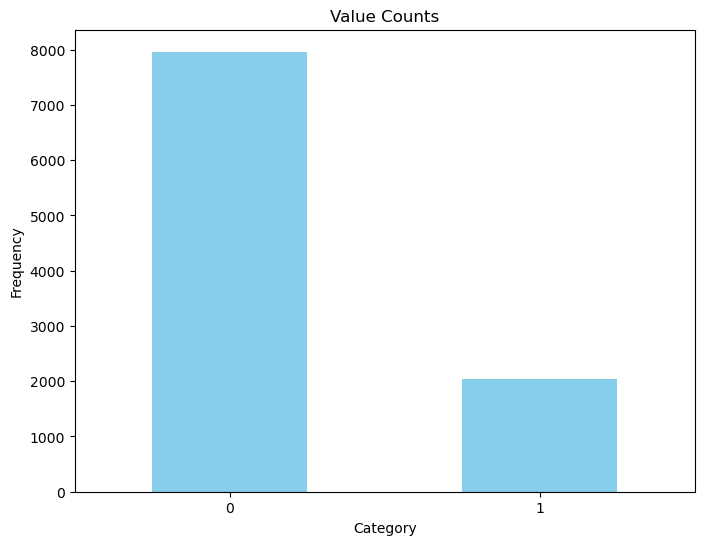

In [97]:
plt.figure(figsize=(8, 6))
values.plot(kind='bar', color='skyblue')
plt.title('Value Counts')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### Model Fitting

## Random Forest Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import roc_auc_score

rfc = rf(random_state=42)
rfc.fit(x_train,y_train)

y_train_pred = rfc.predict(x_train)
y_train_proba = rfc.predict_proba(x_train)[:,1]

y_test_pred = rfc.predict(x_test)
y_test_proba = rfc.predict_proba(x_test)[:,1]

auc_train_rfc = roc_auc_score(y_train,y_train_proba)
auc_test_rfc = roc_auc_score(y_test,y_test_proba)

print(f" The AUC score for train data for RFC : {auc_train_rfc}")
print(f" The AUC score for test data for RFC : {auc_test_rfc}")

 The AUC score for train data for RFC : 1.0
 The AUC score for test data for RFC : 0.8551165035607367


### Tuning Hyperparameters

In [135]:
param_dist = {
    'n_estimators': np.arange(50, 201, 50),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Max depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'bootstrap': [True, False],              # Whether bootstrap samples are used when building trees
}

random_search1 = rsv(estimator=rfc, 
                    param_distributions=param_dist,
                    n_iter=25,                  # Number of random combinations to test (adjusted for 10,000 rows)
                    cv=3,                        # 5-fold cross-validation                 
                    random_state=42)   


random_search1.fit(x_train,y_train)
best_rfc = random_search1.best_estimator_

y_train_pred = best_rfc.predict(x_train)
y_train_proba = best_rfc.predict_proba(x_train)[:, 1]

y_test_pred = best_rfc.predict(x_test)
y_test_proba = best_rfc.predict_proba(x_test)[:, 1]

# Calculate AUC scores
auc_train_rfc = roc_auc_score(y_train, y_train_proba)
auc_test_rfc = roc_auc_score(y_test, y_test_proba)

# Output results
print(f"Best Hyperparameters: {random_search1.best_params_}")
print(f"The AUC score for train data for RFC: {auc_train_rfc}")
print(f"The AUC score for test data for RFC: {auc_test_rfc}")

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
The AUC score for train data for RFC: 0.991023712649621
The AUC score for test data for RFC: 0.8638209595845051


## Decision Tree Classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier as dt

dtc = dt(criterion='gini',random_state=42)
dtc.fit(x_train,y_train)

y_train_pred = dtc.predict(x_train)
y_train_proba = dtc.predict_proba(x_train)[:,1]

y_test_pred = dtc.predict(x_test)
y_test_proba = dtc.predict_proba(x_test)[:,1]

auc_train_dtc = roc_auc_score(y_train,y_train_proba)
auc_test_dtc = roc_auc_score(y_test,y_test_proba)

print(f" The AUC score for train data for DTC : {auc_train_dtc}")
print(f" The AUC score for test data for DTC : {auc_test_dtc}")

 The AUC score for train data for DTC : 1.0
 The AUC score for test data for DTC : 0.6888267712963801


### Tuning Hyperparameters

In [142]:
param_dist = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": list(range(3, 21)),
    "min_samples_split": range(2, 21),
    "min_samples_leaf": range(1, 11),
}

random_search2 = rsv(estimator=dtc, 
                                   param_distributions=param_dist,
                                   n_iter=25,                  # Number of random combinations to test
                                   cv=5,                       # 5-fold cross-validation                 
                                   random_state=42, 
                                   )

random_search2.fit(x_train, y_train)

# Get the best model
best_dtc = random_search2.best_estimator_

# Predict on train and test data
y_train_pred = best_dtc.predict(x_train)
y_train_proba = best_dtc.predict_proba(x_train)[:, 1]

y_test_pred = best_dtc.predict(x_test)
y_test_proba = best_dtc.predict_proba(x_test)[:, 1]

# Calculate AUC scores
auc_train_dtc = roc_auc_score(y_train, y_train_proba)
auc_test_dtc = roc_auc_score(y_test, y_test_proba)

# Output results
print(f"Best Hyperparameters: {random_search2.best_params_}")
print(f"The AUC score for train data for DTC: {auc_train_dtc}")
print(f"The AUC score for test data for DTC: {auc_test_dtc}")

Best Hyperparameters: {'min_samples_split': 20, 'min_samples_leaf': 3, 'max_depth': 8, 'criterion': 'entropy'}
The AUC score for train data for DTC: 0.8995004336961095
The AUC score for test data for DTC: 0.8322056013562551


### KNN Classifier

In [144]:
from sklearn.neighbors import KNeighborsClassifier as kn

knc = kn(n_neighbors = 7)
knc.fit(x_train,y_train)

y_train_pred = knc.predict(x_train)
y_train_proba = knc.predict_proba(x_train)[:,1]

y_test_pred = knc.predict(x_test)
y_test_proba = knc.predict_proba(x_test)[:,1]

auc_train_knc = roc_auc_score(y_train,y_train_proba)
auc_test_knc = roc_auc_score(y_test,y_test_proba)

print(f" The AUC score for train data for KNC : {auc_train_knc}")
print(f" The AUC score for test data for KNC : {auc_test_knc}")

 The AUC score for train data for KNC : 0.9055439526905846
 The AUC score for test data for KNC : 0.7760750958223712


### Tuning Hyperparameters

In [146]:
param_dist = {
    'n_neighbors': range(1, 31)                                     
}

random_search3 = rsv(estimator=knc, 
                                   param_distributions=param_dist,
                                   n_iter=25,                  # Number of random combinations to test
                                   cv=5,                       # 5-fold cross-validation
                                   random_state=42, 
                                   )  

# Fit RandomizedSearchCV
random_search3.fit(x_train, y_train)

# Get the best model
best_knc = random_search3.best_estimator_

# Predict on train and test data
y_train_pred = best_knc.predict(x_train)
y_train_proba = best_knc.predict_proba(x_train)[:, 1]

y_test_pred = best_knc.predict(x_test)
y_test_proba = best_knc.predict_proba(x_test)[:, 1]

# Calculate AUC scores
auc_train_knc = roc_auc_score(y_train, y_train_proba)
auc_test_knc = roc_auc_score(y_test, y_test_proba)

# Output results
print(f"Best Hyperparameters: {random_search3.best_params_}")
print(f"The AUC score for train data for KNC: {auc_train_knc}")
print(f"The AUC score for test data for KNC: {auc_test_knc}")

Best Hyperparameters: {'n_neighbors': 13}
The AUC score for train data for KNC: 0.879736087449414
The AUC score for test data for KNC: 0.8037434511929602


## Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression as lr

lrr = lr(max_iter=300,    # Increased iterations
    random_state=42,
        solver='liblinear')    # Use liblinear solver for optimization
lrr.fit(x_train,y_train)

y_train_pred = lrr.predict(x_train)
y_train_proba = lrr.predict_proba(x_train)[:,1]

y_test_pred = lrr.predict(x_test)
y_test_proba = lrr.predict_proba(x_test)[:,1]

auc_train_lrr = roc_auc_score(y_train,y_train_proba)
auc_test_lrr = roc_auc_score(y_test,y_test_proba)

print(f" The AUC score for train data for LR : {auc_train_lrr}")
print(f" The AUC score for test data for LR : {auc_test_lrr}")

 The AUC score for train data for LR : 0.7651070604684415
 The AUC score for test data for LR : 0.773399227751066


### Tuning Hyperparameters

In [152]:
param_dist = {
    'penalty': ['l1', 'l2'],            # Regularization type
    'solver': ['liblinear'],           # Solver compatible with 'l1' and 'l2'
    'max_iter': [100, 200, 300, 500],  # Maximum iterations
}

# Create Logistic Regression model
lrr = lr(random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search4 = rsv(estimator=lrr, 
                                   param_distributions=param_dist,
                                   n_iter=50,                  # Number of random combinations to test
                                   cv=5,                       # 5-fold cross-validation
                                   random_state=42, 
                                   )                  
# Fit RandomizedSearchCV
random_search4.fit(x_train, y_train)

# Get the best model
best_lrr = random_search4.best_estimator_

# Predict on train and test data
y_train_pred = best_lrr.predict(x_train)
y_train_proba = best_lrr.predict_proba(x_train)[:, 1]

y_test_pred = best_lrr.predict(x_test)
y_test_proba = best_lrr.predict_proba(x_test)[:, 1]

# Calculate AUC scores
auc_train_lrr = roc_auc_score(y_train, y_train_proba)
auc_test_lrr = roc_auc_score(y_test, y_test_proba)

# Output results
print(f"Best Hyperparameters: {random_search4.best_params_}")
print(f"The AUC score for train data for Logistic Regression: {auc_train_lrr}")
print(f"The AUC score for test data for Logistic Regression: {auc_test_lrr}")

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100}
The AUC score for train data for Logistic Regression: 0.7651070604684415
The AUC score for test data for Logistic Regression: 0.773399227751066


## Ada Boost Classifier

In [155]:
from sklearn.ensemble import AdaBoostClassifier as ad
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(max_depth=1)

## Now by default adaboost is using RandomForest with max_depth=1
''' adc = ad(
    base_estimator=base_classifier,  # Using decision tree as base estimator
    n_estimators=50,                 # Number of boosting rounds
    random_state=42) ''' 
                                    

adc = ad(n_estimators=50,                 # Number of boosting rounds
    random_state=42)
adc.fit(x_train,y_train)

y_train_pred = adc.predict(x_train)
y_train_proba = adc.predict_proba(x_train)[:,1]

y_test_pred = adc.predict(x_test)
y_test_proba = adc.predict_proba(x_test)[:,1]

auc_train_adc = roc_auc_score(y_train,y_train_proba)
auc_test_adc = roc_auc_score(y_test,y_test_proba)

print(f" The AUC score for train data for ADC : {auc_train_adc}")
print(f" The AUC score for test data for ADC : {auc_test_adc}")

 The AUC score for train data for ADC : 0.8598075309893272
 The AUC score for test data for ADC : 0.8476856629320512


### Tuning Hyperparameters

In [158]:
param_dist = {
    'n_estimators': np.arange(50, 201, 50),   # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.5, 1, 2],  # How much to weigh each classifier
}

random_search5 = rsv(estimator=adc,
                                   param_distributions=param_dist,
                                   n_iter=50,             # Number of random combinations to test
                                   cv=5,                  # 5-fold cross-validation
                                   random_state=42)
                                   
# Fit the RandomizedSearchCV model
random_search5.fit(x_train, y_train)

# Get the best AdaBoost model
best_adc = random_search5.best_estimator_

# Predict on train and test data
y_train_pred = best_adc.predict(x_train)
y_train_proba = best_adc.predict_proba(x_train)[:, 1]

y_test_pred = best_adc.predict(x_test)
y_test_proba = best_adc.predict_proba(x_test)[:, 1]

# Calculate AUC scores
auc_train_adc = roc_auc_score(y_train, y_train_proba)
auc_test_adc = roc_auc_score(y_test, y_test_proba)

# Output results
print(f"Best Hyperparameters: {random_search5.best_params_}")
print(f"The AUC score for train data for ADC: {auc_train_adc}")
print(f"The AUC score for test data for ADC: {auc_test_adc}")

Best Hyperparameters: {'n_estimators': 150, 'learning_rate': 0.1}
The AUC score for train data for ADC: 0.8539211500645613
The AUC score for test data for ADC: 0.8531174872992833


In [246]:
data = {
    'models' : ['RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifer','LogisticRegression','AdaBoostClassifier'],
    'Test_Auc_Before_Tuning' : [0.854653692846775,0.6901251927787353,0.5311160471287308,0.6715893756236959,0.8476856629320512],
    'Test_AUC_After_Tuning' : [0.863581403655992,0.8319472636759502,0.5486131979724213,0.7730299714233875,0.8531174872992833] 
}

data1 = pd.DataFrame(data)

In [248]:
data1

,models,Test_Auc_Before_Tuning,Test_AUC_After_Tuning
0,RandomForestClassifier,0.854654,0.863581
1,DecisionTreeClassifier,0.690125,0.831947
2,KNeighborsClassifer,0.531116,0.548613
3,LogisticRegression,0.671589,0.773030
4,AdaBoostClassifier,0.847686,0.853117


# Final Thoughts:

## --> Best Performing Models: 
The RandomForestClassifier and AdaBoostClassifier were the best performers, demonstrating high AUC values and reliable predictions. These models are suitable for customer churn prediction due to their ability to capture complex patterns in the data.

## --> Model Selection:
The RandomForestClassifier is the top choice for this task, followed by AdaBoostClassifier. Logistic Regression is a good option when interpretability and simplicity are desired, though it may not be as powerful as the ensemble models.

## --> Challenges:
The Decision Tree and KNN models showed relatively weaker performance, indicating that they may not be the most suitable for this problem without further improvements.

## Finding Feature Selection

In [126]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train a Random Forest
X = df.drop(columns=['Exited'])
y = df['Exited']
model = RandomForestClassifier()
model.fit(X, Y)

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

              Feature  Importance
1                 Age    0.235233
0         CreditScore    0.145436
7     EstimatedSalary    0.144725
3             Balance    0.142299
4       NumOfProducts    0.132229
2              Tenure    0.080273
6      IsActiveMember    0.042275
8   Geography_Germany    0.027242
10        Gender_Male    0.018198
5           HasCrCard    0.018094
9     Geography_Spain    0.013996


In [128]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [184]:
x = df.iloc[:,[0,1,2,3,4,6,7,8]]
y = df['Exited']

In [186]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [188]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import RandomizedSearchCV as rsv
rfc = rf() 
param_dist = {
    'n_estimators': np.arange(50, 201, 50),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Max depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'bootstrap': [True, False],              # Whether bootstrap samples are used when building trees
}

random_search1 = rsv(estimator=rfc, 
                    param_distributions=param_dist,
                    n_iter=25,                  # Number of random combinations to test (adjusted for 10,000 rows)
                    cv=3,                        # 5-fold cross-validation                 
                    random_state=42)   


random_search1.fit(x_train,y_train)
best_rfc = random_search1.best_estimator_

In [189]:
x_train_pred = best_rfc.predict(x_train)
x_train_proba = best_rfc.predict_proba(x_train)[:,1]

x_test_pred = best_rfc.predict(x_test)
x_test_proba = best_rfc.predict_proba(x_test)[:,1]

auc_train_rfc = roc_auc_score(y_train,x_train_proba)
auc_test_rfc = roc_auc_score(y_test,x_test_proba)

print(f"Best Hyperparameters: {random_search1.best_params_}")
print(f"The AUC score for train data for ADC: {auc_train_rfc}")
print(f"The AUC score for test data for ADC: {auc_test_rfc}")

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
The AUC score for train data for ADC: 1.0
The AUC score for test data for ADC: 0.9999999999999999


## Conclusions:
### Feature Importance:
The selected features are critical in determining customer churn (the Exited column). This supports the idea that dimensionality reduction can lead to better generalization by removing irrelevant or redundant features.

### Model Simplicity:
Using fewer features reduces computational cost and simplifies model interpretability without compromising performance, a win-win scenario for deployment and real-world application.

### Overfitting Check:
The train and test AUC scores are nearly identical, suggesting the model is not overfitting, despite its excellent performance.